<a href="https://colab.research.google.com/github/Ronav-Puri/Prof-Project/blob/main/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout, AveragePooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Preprocessing of Dataset 1: Dataset of 30k traces

# The dataset initially consisted of plaintexts, ciphertexts and corresponding 150 trace values.
# This code labels individal components for simplicity, adds a 'key' columm and standardises the trace values.

# dataset = pd.read_csv('/content/output_100_250 .csv', delimiter=' ', header = None)
# key = 'd014f9a8c9ee2589e13f0cc8b6630ca6'

# dataset = dataset.drop(columns = [152], axis = 1)
# dataset = dataset.reset_index(drop=True)

# plaintext = dataset[dataset.columns[0]]
# ciphertext = dataset[dataset.columns[1]]
# traces = dataset[dataset.columns[2:152]]
# plaintext = plaintext.rename('plaintext')
# ciphertext = ciphertext.rename('ciphertext')

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(traces)
# scaled_traces = pd.DataFrame(scaler.transform(traces))

# scaled_dataset = pd.concat([plaintext, ciphertext, scaled_traces], axis = 1)
# scaled_dataset.insert(0, 'key', key)
# scaled_dataset = scaled_dataset.reset_index(drop=True)

# scaled_dataset

In [ ]:
# Preprocessing of Dataset 2: Dataset of 500k traces

dataset = pd.read_csv('/content/drive/MyDrive/aes_data_500k.csv', header = None, low_memory=False)
key = 'd014f9a8c9ee2589e13f0cc8b6630ca6'

dataset = dataset.drop(dataset.columns[152:], axis=1)
for column_index in range(2, 152):
    dataset.iloc[:, column_index] = pd.to_numeric(dataset.iloc[:, column_index], errors='coerce')
    dataset.iloc[:, column_index] = dataset.iloc[:, column_index].round().fillna(0).astype(int)
dataset = dataset.reset_index(drop=True)

plaintext = dataset[dataset.columns[0]]
ciphertext = dataset[dataset.columns[1]]
traces = dataset[dataset.columns[2:152]]
plaintext = plaintext.rename('plaintext')
ciphertext = ciphertext.rename('ciphertext')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(traces)
scaled_traces = pd.DataFrame(scaler.transform(traces))

scaled_dataset = pd.concat([plaintext, ciphertext, scaled_traces], axis = 1)
scaled_dataset.insert(0, 'key', key)
scaled_dataset = scaled_dataset.reset_index(drop=True)
scaled_dataset.iloc[:, 0:3] = scaled_dataset.iloc[:, 0:3].astype(str)

scaled_dataset

<ipython-input-3-ee5ffd16f3c2>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.iloc[:, column_index] = dataset.iloc[:, column_index].round().fillna(0).astype(int)
<ipython-input-3-ee5ffd16f3c2>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset.iloc[:, column_index] = dataset.iloc[:, column_index].round().fillna(0).astype(int)
<ipython-input-3-ee5ffd16f3c2>:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in 

,key,plaintext,ciphertext,0,1,2,3,4,5,6,...,140,141,142,143,144,145,146,147,148,149
0,d014f9a8c9ee2589e13f0cc8b6630ca6,9b9c65790b4fe93207273499ce095748,5c6df5b846fbcf97328c363a71e4c469,-2.574892,1.296115,-8.528143,0.195988,1.990802,1.871229,2.247083,...,1.726986,1.558013,-4.552832,-0.594870,-0.412503,1.221296,0.529915,-0.346636,-0.868324,-0.788342
1,d014f9a8c9ee2589e13f0cc8b6630ca6,5c6df5b846fbcf97328c363a71e4c469,628ce3602b274ecce7d76c6449738046,-2.574892,1.068031,-1.806051,-0.444448,-0.287887,1.495165,2.027211,...,1.199171,0.910070,-0.918006,-1.133565,-0.935073,0.514728,-0.259268,-1.172191,-1.057733,-0.788342
2,d014f9a8c9ee2589e13f0cc8b6630ca6,628ce3602b274ecce7d76c6449738046,8c8c2711ca3183e76c41b5bcfad50070,-4.059324,-0.756642,-1.547509,1.156644,1.041349,-0.635860,-0.171510,...,-0.535079,-0.580200,1.626372,1.627247,1.590682,-0.577241,-0.785390,0.754103,1.152046,1.407338
3,d014f9a8c9ee2589e13f0cc8b6630ca6,8c8c2711ca3183e76c41b5bcfad50070,91f13b5569ce1409eb0d22ec6b2244c3,-2.917453,0.383779,-4.132929,-1.645267,-0.667668,0.868393,0.048362,...,0.671356,0.650892,-0.554524,-1.200902,-0.935073,0.322027,0.595680,-1.034599,-0.868324,-0.963997
4,d014f9a8c9ee2589e13f0cc8b6630ca6,91f13b5569ce1409eb0d22ec6b2244c3,0c638ba6f201e0e70c6855629d340f47,-2.574892,0.611863,-4.132929,-0.684612,0.091895,0.868393,0.707979,...,0.897562,0.845275,0.354183,-0.796880,-0.847978,0.900129,0.661446,-1.172191,-1.247143,-0.963997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499934,d014f9a8c9ee2589e13f0cc8b6630ca6,1ee84cfe5234a6464bfcba5d340d5a96,91d582fd4eeef9f06879bfa27b0fc795,2.106777,1.866326,2.072079,-0.044175,0.471676,1.620520,2.466955,...,0.671356,0.650892,-0.736265,-0.796880,-0.412503,0.964362,0.858741,-0.484229,-0.678914,-0.963997
499935,d014f9a8c9ee2589e13f0cc8b6630ca6,91d582fd4eeef9f06879bfa27b0fc795,6db4244a76e6feb450e38a14b8363ce7,0.622345,0.269737,-2.064593,-1.325049,-1.047450,0.492330,-0.831126,...,1.651584,1.298835,-0.009300,-0.864217,-0.847978,0.514728,0.595680,-1.722561,-1.310280,-1.403133
499936,d014f9a8c9ee2589e13f0cc8b6630ca6,6db4244a76e6feb450e38a14b8363ce7,d9d730c26dfe976d5719f51000832186,1.079093,1.068031,-0.254799,-0.684612,-1.617122,0.743039,0.488107,...,1.425378,1.234041,-0.372782,-0.864217,-0.847978,0.707428,0.990272,-0.621821,-0.868324,-0.612688
499937,d014f9a8c9ee2589e13f0cc8b6630ca6,d9d730c26dfe976d5719f51000832186,0042d3c8a94cdf3a1f33e6963e5e56a6,1.307468,0.839947,-0.254799,-0.844721,0.091895,0.993748,1.147723,...,-0.082666,0.002949,-2.371936,-1.268238,-0.847978,0.193561,0.069558,-1.584968,-1.310280,-0.963997


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Preprocessing of Dataset 3: Fresh dataset of 100k traces

In [ ]:
import zipfile

zip_path = "/content/your_dataset.zip"  # Update this path
csv_filename = "your_dataset.csv"  # Update this with the actual filename inside the zip

# Open the zip file and read CSV directly
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as f:
        df_sample = pd.read_csv(f, nrows=100)  # Read only first 100 rows

print(df_sample.head())  # Display first few rows


In [ ]:
# For each datapoint, define the label as = Sbox_Inv(CT ^ Key) ^ CT.
# In the CNN model described later, the 150 trace values are treated as features, and parameters are fine-tuned
# to predict the correct corresponding label.

# This code adds a column of 'label' for each data point and computes the label as well.

AES_INV_SBOX = [
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
]

import re

def calculate_xor(ciphertext_value):
    ciphertext_value = re.sub(r"[^0-9a-fA-F]", "", str(ciphertext_value))

    if len(ciphertext_value) % 2 != 0:
        ciphertext_value = '0' + ciphertext_value

    key_byte = bytearray.fromhex(key)[0]
    cipher_byte = bytearray.fromhex(ciphertext_value)[0]
    xor_result = key_byte ^ cipher_byte
    sbox_inv_result = AES_INV_SBOX[xor_result]
    final_result = sbox_inv_result ^ cipher_byte
    return final_result

scaled_dataset['label'] = scaled_dataset['ciphertext'].apply(calculate_xor)
columns_to_drop = ['key', 'plaintext']
scaled_dataset = scaled_dataset.drop(columns=columns_to_drop, axis=1)
scaled_dataset

,ciphertext,0,1,2,3,4,5,6,7,8,...,141,142,143,144,145,146,147,148,149,label
0,5c6df5b846fbcf97328c363a71e4c469,-2.574892,1.296115,-8.528143,0.195988,1.990802,1.871229,2.247083,0.000935,-0.241612,...,1.558013,-4.552832,-0.594870,-0.412503,1.221296,0.529915,-0.346636,-0.868324,-0.788342,172
1,628ce3602b274ecce7d76c6449738046,-2.574892,1.068031,-1.806051,-0.444448,-0.287887,1.495165,2.027211,-0.001063,-0.527385,...,0.910070,-0.918006,-1.133565,-0.935073,0.514728,-0.259268,-1.172191,-1.057733,-0.788342,92
2,8c8c2711ca3183e76c41b5bcfad50070,-4.059324,-0.756642,-1.547509,1.156644,1.041349,-0.635860,-0.171510,0.020905,1.244410,...,-0.580200,1.626372,1.627247,1.590682,-0.577241,-0.785390,0.754103,1.152046,1.407338,43
3,91f13b5569ce1409eb0d22ec6b2244c3,-2.917453,0.383779,-4.132929,-1.645267,-0.667668,0.868393,0.048362,-0.019036,-0.984622,...,0.650892,-0.554524,-1.200902,-0.935073,0.322027,0.595680,-1.034599,-0.868324,-0.963997,105
4,0c638ba6f201e0e70c6855629d340f47,-2.574892,0.611863,-4.132929,-0.684612,0.091895,0.868393,0.707979,-0.015042,-0.927468,...,0.845275,0.354183,-0.796880,-0.847978,0.900129,0.661446,-1.172191,-1.247143,-0.963997,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499934,91d582fd4eeef9f06879bfa27b0fc795,2.106777,1.866326,2.072079,-0.044175,0.471676,1.620520,2.466955,-0.005057,-0.527385,...,0.650892,-0.736265,-0.796880,-0.412503,0.964362,0.858741,-0.484229,-0.678914,-0.963997,105
499935,6db4244a76e6feb450e38a14b8363ce7,0.622345,0.269737,-2.064593,-1.325049,-1.047450,0.492330,-0.831126,-0.029021,-1.156086,...,1.298835,-0.009300,-0.864217,-0.847978,0.514728,0.595680,-1.722561,-1.310280,-1.403133,160
499936,d9d730c26dfe976d5719f51000832186,1.079093,1.068031,-0.254799,-0.684612,-1.617122,0.743039,0.488107,-0.029021,-1.041777,...,1.234041,-0.372782,-0.864217,-0.847978,0.707428,0.990272,-0.621821,-0.868324,-0.612688,153
499937,0042d3c8a94cdf3a1f33e6963e5e56a6,1.307468,0.839947,-0.254799,-0.844721,0.091895,0.993748,1.147723,-0.013045,-0.641694,...,0.002949,-2.371936,-1.268238,-0.847978,0.193561,0.069558,-1.584968,-1.310280,-0.963997,96


In [ ]:
power_traces = scaled_dataset.iloc[:, 3:153].values
labels = scaled_dataset['label'].values

encoder = OneHotEncoder(sparse_output=False, categories='auto')
labels_onehot = encoder.fit_transform(labels.reshape(-1, 1))

In [ ]:
# CNN Model for the corresponding labels (Accuracy = )

X_train, X_test, y_train, y_test = train_test_split(power_traces, labels_onehot, test_size=0.2, random_state=42)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

model = Sequential([
    Conv1D(64, kernel_size=7, activation='relu', input_shape=(150, 1), padding='same'),
    BatchNormalization(),
    #AveragePooling1D(pool_size=2),
    #Dropout(0.2),

    Conv1D(128, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    #AveragePooling1D(pool_size=2),
    #Dropout(0.2),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    #AveragePooling1D(pool_size=2),
    #Dropout(0.4),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.4),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.4),

    Conv1D(512, kernel_size=1, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.3),

    Conv1D(512, kernel_size=1, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(1024, activation='relu'),
    Dropout(0.4),

    Dense(labels_onehot.shape[1], activation='softmax')
])

from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, batch_size=1024, validation_data=(X_test, y_test))
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 98ms/step - accuracy: 0.0041 - loss: 5.8796 - val_accuracy: 0.0066 - val_loss: 5.5270
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 51s 56ms/step - accuracy: 0.0064 - loss: 5.5635 - val_accuracy: 0.0093 - val_loss: 5.2443
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.0095 - loss: 5.2959 - val_accuracy: 0.0092 - val_loss: 4.9836
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 54ms/step - accuracy: 0.0107 - loss: 5.0951 - val_accuracy: 0.0137 - val_loss: 4.8097
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.0157 - loss: 4.9216 - val_accuracy: 0.0241 - val_loss: 4.5188
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0247 - loss: 4.5187
Test Accuracy: 2.41%


In [ ]:
# CNN Model if instead of the old label, the Hamming Weight of the corresponding label is used
power_traces = scaled_dataset.iloc[:, 3:153].values
labels = scaled_dataset['label'].values
encoder = OneHotEncoder(sparse_output=False, categories=[range(9)])

labels_hw = scaled_dataset.iloc[:, -1].apply(lambda x: bin(x).count('1')).values

labels_hw_onehot = encoder.fit_transform(labels_hw.reshape(-1, 1))

X_train_hw, X_test_hw, y_train_hw, y_test_hw = train_test_split(power_traces, labels_hw_onehot, test_size=0.2, random_state=42)

X_train_hw = X_train_hw[..., np.newaxis]
X_test_hw = X_test_hw[..., np.newaxis]

model_hw = Sequential([
    Conv1D(64, kernel_size=7, activation='relu', input_shape=(150, 1), padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.2),

    Conv1D(128, kernel_size=5, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.2),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.4),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.4),

    Conv1D(256, kernel_size=3, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.4),

    Conv1D(512, kernel_size=1, activation='relu', padding='same'),
    BatchNormalization(),
    AveragePooling1D(pool_size=2),
    #Dropout(0.3),

    Conv1D(512, kernel_size=1, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),
    #Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.4),
    Dense(1024, activation='relu'),
    Dropout(0.4),

    Dense(labels_hw_onehot.shape[1], activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model_hw.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_hw = model_hw.fit(X_train_hw, y_train_hw, epochs=50, batch_size=1024, validation_data=(X_test_hw, y_test_hw))
hw_test_loss, hw_test_accuracy = model_hw.evaluate(X_test_hw, y_test_hw)
print(f"Test Accuracy: {hw_test_accuracy * 100:.2f}%")

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 63ms/step - accuracy: 0.7539 - loss: 0.5692 - val_accuracy: 0.6169 - val_loss: 0.7855
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.7636 - loss: 0.5515 - val_accuracy: 0.3893 - val_loss: 2.2771
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7572 - loss: 0.5650 - val_accuracy: 0.3307 - val_loss: 2.3650
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7528 - loss: 0.5654 - val_accuracy: 0.5126 - val_loss: 1.1110
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7655 - loss: 0.5438 - val_accuracy: 0.6034 - val_loss: 1.1195
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.7756 - loss: 0.5232 - val_accuracy: 0.5609 - val_loss: 0.9655
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7598 - loss: 0.5515 - val_accuracy: 0.4470 - val_loss: 1.4897
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.7472 - loss: 0.5925 - 

In [ ]:
model_hw.save('/content/drive/MyDrive/trained_model_hw.h5')

In [ ]:
# Save accuracy in a text file
with open("/content/drive/MyDrive/model_hw_accuracy.txt", "w") as f:
    f.write(f"Accuracy: {hw_test_accuracy}")


In [ ]:
import json

metadata = {
    "accuracy": hw_test_accuracy
}

# Save metadata to a JSON file
with open("/content/drive/MyDrive/model_metadata.json", "w") as f:
    json.dump(metadata, f)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1876/1876 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2032/2032 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2344/2344 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2501/2501 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2657/2657 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
2969/2969 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


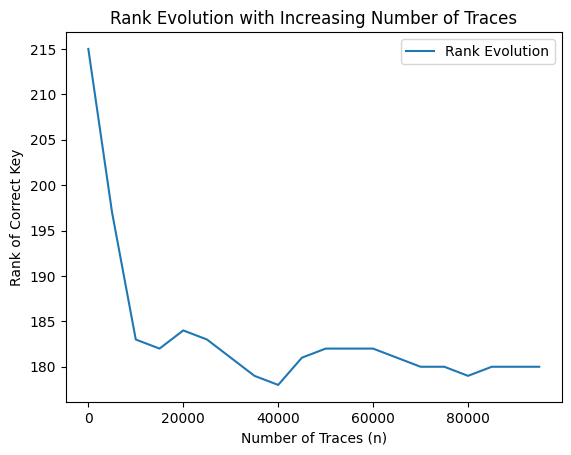

In [ ]:
import matplotlib.pyplot as plt

epsilon = 1e-10

def rank(model, X_test, y_test, key_candidates, correct_key, n):
    predictions = model.predict(X_test[:n])

    #n_traces = X_test.shape[0]
    scores = {key: 0 for key in key_candidates}
    for trace_idx in range(n):
        for key in key_candidates:
            scores[key] += np.log(predictions[trace_idx, key] + epsilon) # Adding log because multiplying probabilities can get very small

    correct_key_score = scores[correct_key]

    ans_rank = sum(1 for key, score in scores.items() if score > correct_key_score)
    return ans_rank

num_classes = 256
key_candidates = list(range(num_classes))
correct_key = int("d0", 16)  #208
n_values = range(1, len(X_test) + 1, 5000)  # Number of traces to test

ranks = []
for n in n_values:
    rank_value = rank(model, X_test, y_test, key_candidates, correct_key, n)
    ranks.append(rank_value)

# Plot rank evolution
plt.plot(n_values, ranks, label="Rank Evolution")
plt.xlabel("Number of Traces (n)")
plt.ylabel("Rank of Correct Key")
plt.title("Rank Evolution with Increasing Number of Traces")
plt.legend()
plt.show()